In [49]:
from Arm import Arm
from Simulation import Simulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

import numpy as np
import math
import random

In [50]:
# Setup Arm
arm = Arm((0, 0))
number_of_linkeages = 50  # choose to your liking
for i in range(number_of_linkeages):
    arm.add_linkeage(np.random.uniform(-np.pi, np.pi), np.random.uniform(0.1, 1))

initial_angles = arm.linkeage_angles.copy()

# Goal Generation
bounds = sum(arm.linkeage_lengths)
radius = bounds
theta = 2 * math.pi * random.random()
length = random.random() * radius /4 + radius / 2
x = length * math.cos(theta)
y = length * math.sin(theta)
goal = (x, y)
# Set up simulation
sim = Simulation(goal, arm, angle_change_limit=np.pi, use_newton=False)

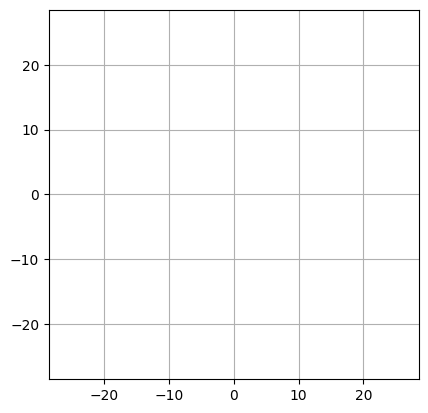

In [51]:
# Matplotlib setup
fig, ax = plt.subplots()
ax.set_xlim(-bounds, bounds)
ax.set_ylim(-bounds, bounds)
ax.set_aspect('equal', adjustable='box')
ax.grid(True)

# Plotted elements
arm_line, = ax.plot([], [], 'o-', lw=4)
goal_dot, = ax.plot([], [], 'g*', markersize=12)
text_handle = ax.text(0, 0, "", fontsize=10, ha='right')
iteration_text_handle = ax.text(0, -bounds * 0.9, "", fontsize=10, ha='right')

In [52]:
# Init function
def init():
    arm_line.set_data([], [])
    goal_dot.set_data([goal[0]], [goal[1]])
    text_handle.set_text("")
    return arm_line, goal_dot, text_handle

# Stop flag
done = {"stop": False}
max_steps = 1000

# Generator function to yield frames until done
def frame_generator():
    for i in range(max_steps):
        iteration_text_handle.set_text(f"Iteration: {i}")
        if done["stop"]:
            break
        yield i 

# Update function with stop flag
def update(_):
    diff = sim.update()
    positions = arm.get_joint_positions()
    xs, ys = zip(*positions)
    arm_line.set_data(xs, ys)

    end_effector = arm.calculate_end_position()
    distance = np.linalg.norm(np.array(end_effector) - np.array(goal))
    
    text_handle.set_position((goal[0], goal[1]))
    text_handle.set_text(f"Distance: {distance:.2f}")

    if diff < 0.001 or distance < 0.01:
        done["stop"] = True

    return arm_line, goal_dot, text_handle

In [53]:
# Run animation with generator
anim = FuncAnimation(fig, update, frames=frame_generator, init_func=init, blit=True, interval=75)

# Display animation in notebook
HTML(anim.to_jshtml())

C:\Users\geodz\AppData\Local\Temp\ipykernel_74280\3436504561.py:2: UserWarning: frames=<function frame_generator at 0x000002A4ADF32D40> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update, frames=frame_generator, init_func=init, blit=True, interval=75)


In [54]:
# reset stuff
done["stop"] = False
arm.change_angles(initial_angles)
sim.use_newton = True

# Run animation with generator
anim = FuncAnimation(fig, update, frames=frame_generator, init_func=init, blit=True, interval=75)

# Display animation in notebook
HTML(anim.to_jshtml())

C:\Users\geodz\AppData\Local\Temp\ipykernel_74280\1375023756.py:7: UserWarning: frames=<function frame_generator at 0x000002A4ADF32D40> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = FuncAnimation(fig, update, frames=frame_generator, init_func=init, blit=True, interval=75)
